In [ ]:
!pip install ktrain

     |████████████████████████████████| 25.3 MB 33.3 MB/s 
     |████████████████████████████████| 6.8 MB 35.8 MB/s 
     |████████████████████████████████| 981 kB 20.7 MB/s 
     |████████████████████████████████| 263 kB 49.7 MB/s 
     |████████████████████████████████| 2.8 MB 20.1 MB/s 
     |████████████████████████████████| 1.2 MB 39.6 MB/s 
     |████████████████████████████████| 468 kB 46.4 MB/s 
     |████████████████████████████████| 61 kB 492 kB/s 
     |████████████████████████████████| 895 kB 41.2 MB/s 
     |████████████████████████████████| 3.3 MB 38.0 MB/s 
     |████████████████████████████████| 596 kB 48.3 MB/s 
  Created wheel for ktrain: filename=ktrain-0.28.3-py3-none-any.whl size=25292659 sha256=fbd9ecb3b2a3d57764a3b1e1200a54ad0d91814ff14be19dfce5e553894b3aeb
  Stored in directory: /root/.cache/pip/wheels/6a/7e/c3/f46cdfc2b81c54424923b1405d7e670c35cacc11ada9a47b1c
  Created wheel for seqeval: filename=seqeval-0.0.19-py3-none-any.whl size=9929 sha256=f4d03d2198f3c34

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import ktrain
from ktrain import text

In [ ]:
df = pd.read_csv('consolidated.csv')
# df = pd.read_csv('drive/MyDrive/Datasets/CSE4001_PDC_Project/consolidated.csv')

In [ ]:
df

,Date,1,2,3,4,5,6,7,8,9,10,11,12,Label,Pct_inc,Bin_label,Up,Down
0,08-09-1998,Boeing gets Varig order,Airbus gets Emirates order,Dow set for early takeoff,CNNfn market movers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Inc,1.936619718,Up,1,0
1,09-09-1998,UPS flies with Airbus,Boeing Airbus split order,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dec,-2.590673575,Down,0,1
2,05-10-1998,Boeing boosts output,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Inc,2.111324376,Up,1,0
3,07-10-1998,Raytheon cuts 14000 jobs,Open skies' at an impasse,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dec,-2.466793169,Down,0,1
4,08-10-1998,Wall Street struggles in pain,Selling pressure eases,Wall Street reels in pain,Wall St. shaken up,More turmoil for U.S. stocks,Yen takes second bite of bond,NaN,NaN,NaN,NaN,NaN,NaN,Dec,-2.946954813,Down,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6073,17-02-2017,Trump and jobs: A running fact check,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Inc,0.784543054,Up,1,0
6074,21-02-2017,Move over Amazon: Here comes Walmart,Retailers report; Central bank chatter; Stock ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Inc,0.337028512,Up,1,0
6075,22-02-2017,These 10 stocks dominate the market,How Trump could make the trade deficit look worse,Amazon brings free shipping minimum back down ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dec,-0.747406228,Down,0,1
6076,23-02-2017,Fallen angels? Victoria's Secret sales plunge,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dec,-0.958336111,Down,0,1


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [ ]:
df.head()

,Date,1,2,3,4,5,6,7,8,9,10,11,12,Label,Pct_inc,Bin_label,Up,Down
0,08-09-1998,Boeing gets Varig order,Airbus gets Emirates order,Dow set for early takeoff,CNNfn market movers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Inc,1.936619718,Up,1,0
1,09-09-1998,UPS flies with Airbus,Boeing Airbus split order,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dec,-2.590673575,Down,0,1
2,05-10-1998,Boeing boosts output,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Inc,2.111324376,Up,1,0
3,07-10-1998,Raytheon cuts 14000 jobs,Open skies' at an impasse,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dec,-2.466793169,Down,0,1
4,08-10-1998,Wall Street struggles in pain,Selling pressure eases,Wall Street reels in pain,Wall St. shaken up,More turmoil for U.S. stocks,Yen takes second bite of bond,NaN,NaN,NaN,NaN,NaN,NaN,Dec,-2.946954813,Down,0,1


In [ ]:
# df2 = df[['1','2','3','4','5','6','7','8','9','10','11','12','Bin_label']]
# df2["News Headline"] = ""
# for i in range(len(df2)):
#   for j in df2.loc[i]:
#     if not pd.isna(j):
#       df2['News Headline'][i] = df2['News Headline'][i]+". "+str(j)
#     else:
#       break
# df3 = df2[['News Headline','Bin_label']]
# df3.head()
df.fillna('',inplace = True)
X = []
for i in range(0,len(df)):
    arr = [x.strip() for x in list(df.iloc[i,np.arange(1,13)])]
    arr2 = [x+'.' if not (x.endswith('.') or x.endswith('?') or x.endswith('!')) and not x=='' else x for x in arr]
    s = ' '.join(arr2)
    X.append(s.strip())
df3 = pd.DataFrame()
df3['News Headline'] = X
df3['Bin_label'] = df.Bin_label.values
df3.head()

,News Headline,Bin_label
0,Boeing gets Varig order. Airbus gets Emirates ...,Up
1,UPS flies with Airbus. Boeing Airbus split or...,Down
2,Boeing boosts output.,Up
3,Raytheon cuts 14000 jobs. Open skies' at an im...,Down
4,Wall Street struggles in pain. Selling pressur...,Down


In [ ]:
df3['News Headline'][4910]

"A surprise leap in jobs wages. Thursday's tech rally."

In [ ]:
x = df2['News Headline']
y= df3['Bin_label']
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=32)

In [ ]:
df['Bin_label'].unique

<bound method Series.unique of 0         Up
1       Down
2         Up
3       Down
4       Down
        ... 
6073      Up
6074      Up
6075    Down
6076    Down
6077      Up
Name: Bin_label, Length: 6078, dtype: object>

In [ ]:
(X_train,y_train),(X_test,y_test),preprocess = text.texts_from_df(train_df = df3,
                                                                  text_column = 'News Headline',
                                                                  label_columns = 'Bin_label',
                                                                  val_df = df3,
                                                                  maxlen = 30,
                                                                  preprocess_mode = 'bert')

['Bin_label', 'Down', 'Up']
   Bin_label  Down   Up
0        0.0   0.0  1.0
1        0.0   1.0  0.0
2        0.0   0.0  1.0
3        0.0   1.0  0.0
4        0.0   1.0  0.0
['Bin_label', 'Down', 'Up']
   Bin_label  Down   Up
0        0.0   0.0  1.0
1        0.0   1.0  0.0
2        0.0   0.0  1.0
3        0.0   1.0  0.0
4        0.0   1.0  0.0
downloading pretrained BERT model (uncased_L-12_H-768_A-12.zip)...
[██████████████████████████████████████████████████]
extracting pretrained BERT model...
done.

cleanup downloaded zip...
done.

preprocessing train...
language: en


Is Multi-Label? False
preprocessing test...
language: en


In [ ]:
model = text.text_classifier(name = 'bert',
                             train_data = (X_train,y_train),
                             preproc = preprocess)

Is Multi-Label? False
maxlen is 30
done.


In [ ]:
learner = ktrain.get_learner(model = model,
                             train_data = (X_train,y_train),
                             val_data = (X_test,y_test),
                             batch_size = 6)

In [ ]:
learner.fit_onecycle(lr = 1e-5,epochs = 10)



begin training using onecycle policy with max lr of 1e-05...
Epoch 1/10
1013/1013 [==============================] - 225s 203ms/step - loss: 0.7226 - accuracy: 0.4987 - val_loss: 0.6933 - val_accuracy: 0.5296
Epoch 2/10
1013/1013 [==============================] - 203s 201ms/step - loss: 0.6997 - accuracy: 0.5110 - val_loss: 0.6832 - val_accuracy: 0.5591
Epoch 3/10
1013/1013 [==============================] - 202s 200ms/step - loss: 0.6871 - accuracy: 0.5558 - val_loss: 0.6485 - val_accuracy: 0.5979
Epoch 4/10
1013/1013 [==============================] - 202s 200ms/step - loss: 0.6523 - accuracy: 0.6102 - val_loss: 0.5256 - val_accuracy: 0.7836
Epoch 5/10
1013/1013 [==============================] - 202s 200ms/step - loss: 0.5348 - accuracy: 0.7354 - val_loss: 0.2565 - val_accuracy: 0.9294
Epoch 6/10
1013/1013 [==============================] - 204s 202ms/step - loss: 0.3127 - accuracy: 0.8728 - val_loss: 0.0927 - val_accuracy: 0.9763
Epoch 7/10
1013/1013 [===========================

In [ ]:
learner.save_model('NLP_Model')
learner.load_model('NLP_Model')
# learner.save_model('drive/MyDrive/Models')


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


In [ ]:
predictor = ktrain.get_predictor(learner.model,preprocess)
predictor.save("stock_mvmt_predict")

/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


In [ ]:
type(predictor)

ktrain.text.predictor.TextPredictor

In [ ]:
data = df3.iloc[0,0]
data

'Boeing gets Varig order. Airbus gets Emirates order. Dow set for early takeoff. CNNfn market movers.'

In [ ]:
predictor.predict(data)

'Up'

In [ ]:
predictor2 = ktrain.load_predictor(r"drive/MyDrive/Models/stock_mvmt_predict")
#modelx = ktrain.models.load_model(r"drive/MyDrive/Models/stock_mvmt_predict.h5/tf_model.h5")


In [ ]:
for i in range(len(df)):
  data = df3['News Headline'][i]
  pred = predictor2.predict(data)
  print(df3['Bin_label'][i],pred)

Up Up
Down Down
Up Up
Down Down
Down Down
Up Up
Up Up
Up Up
Down Down
Up Up
Up Up
Down Down
Up Up
Up Up
Up Up
Down Down
Down Down
Up Up
Down Down
Down Down
Down Down
Down Down
Up Up
Up Up
Up Up
Up Up
Down Down
Up Up
Down Down
Down Down
Up Up
Up Up
Down Down
Down Down
Down Down
Down Down
Up Up
Down Down
Up Up
Down Down
Up Up
Up Up
Down Down
Down Down
Up Up
Down Down
Down Down
Down Down
Down Down
Down Down
Up Up
Up Up
Up Up
Down Down
Down Down
Up Up
Down Down
Up Up
Up Up
Down Down
Down Down
Up Up
Down Down
Up Up
Down Down
Down Down
Up Up
Down Down
Down Down
Up Up
Up Up
Up Up
Down Down
Down Down
Up Up
Up Up
Down Down
Up Up
Down Down
Up Up
Up Up
Up Up
Down Down
Down Down
Up Up
Down Down
Down Down
Up Up
Up Up
Up Up
Down Down
Up Up
Up Up
Up Up
Down Down
Up Up
Down Down
Down Down
Up Up
Up Up
Up Up
Up Up
Down Down
Down Down
Down Down
Up Down
Up Up
Down Down
Up Up
Up Up
Down Down
Up Up
Down Down
Down Down
Down Down
Down Down
Up Up
Down Down
Up Up
Down Down
Up Up
Down Down
Up Up
Up Up
Down Down


KeyboardInterrupt: ignored

In [ ]:
from bs4 import BeautifulSoup as bs
import requests
from datetime import datetime
import pandas as pd
import numpy as np
import re
import time
import math
import random

In [ ]:
def scrape_ticker(ticker):
    global newdf0
    url = "https://finviz.com/quote.ashx?t="+ticker
    html_text = requests.get(url,headers={'User-Agent': 'Mozilla/5.0'}).text
    soup = bs(html_text,"html.parser")
    table = soup.find("table",{"class":"fullview-news-outer"})
    company = None
    try:
        company = soup.find("table",{"class":"fullview-title"}).find("a",{"class":"tab-link"}).find("b").decode_contents()
    except:
        company = ""
    #print(table)
    rows = table.find_all("tr")
    datelist = []
    headlines = []
    count = 0
    for row in rows:
        datecell = row.find("td",{"align":"right"})
        date_content = datecell.decode_contents()
        #print(date_content)
        try:
            datetime_object = datetime.strptime(str(date_content).strip(), '%b-%d-%y %I:%M%p')
            date_string = str(datetime_object).split()[0]
        except ValueError:
            date_string = datelist[count-1]
        #if date_string not in datelist:
        datelist.append(date_string)
        newscell = row.find("a",{"class":"tab-link-news"})
        news_content = newscell.decode_contents()
        headlines.append(news_content)
        count+=1
    tickers = [ticker for i in range(len(datelist))] 
    companies = [company for i in range(len(tickers))]
    df = pd.DataFrame({"date":datelist,"ticker": tickers,"company":companies,"headline":headlines})
    return df

In [ ]:
ids = ["signals_1","signals_2"]
tickers = {'ticker':[],'href':[],'state':[]}
for i in ids:
    url = "https://finviz.com/"
    html_text = requests.get(url,headers={'User-Agent': 'Mozilla/5.0'}).text
    soup = bs(html_text,"html.parser")
    table = soup.find("table",{"id":i})
    rows = table.find_all('tr')
    for row in rows:
        try:
            anchor_ticker = row.find('a',{'class':'tab-link'})
            anchor_state = row.find('a',{'class':'tab-link-nw'})
            href = anchor_ticker['href']
            ticker = anchor_ticker.decode_contents()
            state = anchor_state.decode_contents()
            tickers['ticker'].append(ticker)
            tickers['href'].append(href)
            tickers['state'].append(state)
        except:
            pass

In [ ]:
df = pd.DataFrame(tickers).iloc[:,[0,2]]
href_ticker = tickers['ticker']
print(href_ticker)

['TACO', 'ISIG', 'ACET', 'HUDI', 'STG', 'NRT', 'CFVI', 'CFVIU', 'GCP', 'TACO', 'CFVI', 'CFVIU', 'ISIG', 'ACET', 'ABGI', 'TACO', 'AAL', 'DLHC', 'FARM', 'AEI', 'BOLT', 'AGLE', 'RETA', 'BTCS', 'ARBK', 'AEI', 'AGLE', 'RETA', 'YMTX', 'SVOK', 'SVOKU', 'TC', 'RETA', 'CFVI', 'SQQQ', 'ACEL', 'COUP', 'CHD']


In [ ]:
newdf0 = pd.DataFrame()
begin = time.time()
df1 = df[0:2]
df0 = pd.DataFrame()
num_of_tickers = len(df)
for i in range(num_of_tickers):
    newdf = scrape_ticker(df.iloc[i]['ticker'])
    print(str(i+1)+" of "+str(num_of_tickers),end="\r")
    df0 = df0.append(newdf)
end = time.time()
print(f"Total time taken to scrape: {end - begin} seconds")
df0

Total time taken to scrape: 15.938714981079102 seconds


,date,ticker,company,headline
0,2021-12-06,TACO,"Del Taco Restaurants, Inc.",Jack in the Box is Buying Rival Del Taco
1,2021-12-06,TACO,"Del Taco Restaurants, Inc.",Del Taco Restaurants Stock Is Flying. Jack in ...
2,2021-12-06,TACO,"Del Taco Restaurants, Inc.",Jack in the Box to acquire Del Taco for over $...
3,2021-12-06,TACO,"Del Taco Restaurants, Inc.",Jack in the Box to acquire Del Taco for over $...
4,2021-12-06,TACO,"Del Taco Restaurants, Inc.",Jack in the Box buying Del Taco
...,...,...,...,...
95,2020-12-02,CHD,"Church &amp; Dwight Co., Inc.",Church &amp; Dwight (CHD) Boosts Portfolio Wit...
96,2020-12-01,CHD,"Church &amp; Dwight Co., Inc.",Halle Berry Named Collaborative Partner of the...
97,2020-12-01,CHD,"Church &amp; Dwight Co., Inc.","Gryphon Investors Sells Matrixx, Maker of Zica..."
98,2020-12-01,CHD,"Church &amp; Dwight Co., Inc.",Church &amp; Dwight Acquires Zicam Brand for $...


In [ ]:
import time

def mvmt_prediction(x):
    sentence = x
    return predictor2.predict(sentence)
    
prediction = []
begin = time.time()
n = len(df0)
for headline in df0["headline"].values:
    prediction.append(mvmt_prediction(headline))
    print(str(i+1)+" of "+str(n),end="\r")
end = time.time()
print(f"Total time taken to calculate sentiment: {end - begin} seconds")
prediction
# string = str(df0["headline"][i])
# mvmt_prediction(string)


Total time taken to calculate sentiment: 207.06876635551453 seconds


['Up',
 'Up',
 'Up',
 'Up',
 'Down',
 'Down',
 'Down',
 'Up',
 'Up',
 'Up',
 'Down',
 'Down',
 'Down',
 'Down',
 'Up',
 'Up',
 'Down',
 'Down',
 'Down',
 'Up',
 'Up',
 'Up',
 'Up',
 'Up',
 'Up',
 'Down',
 'Up',
 'Up',
 'Up',
 'Up',
 'Up',
 'Up',
 'Down',
 'Up',
 'Up',
 'Up',
 'Up',
 'Up',
 'Up',
 'Up',
 'Up',
 'Up',
 'Up',
 'Up',
 'Up',
 'Up',
 'Up',
 'Up',
 'Up',
 'Down',
 'Up',
 'Up',
 'Down',
 'Up',
 'Up',
 'Up',
 'Down',
 'Up',
 'Up',
 'Up',
 'Down',
 'Down',
 'Up',
 'Up',
 'Up',
 'Down',
 'Up',
 'Down',
 'Up',
 'Up',
 'Up',
 'Up',
 'Up',
 'Up',
 'Down',
 'Down',
 'Up',
 'Down',
 'Up',
 'Up',
 'Down',
 'Up',
 'Up',
 'Up',
 'Up',
 'Up',
 'Down',
 'Up',
 'Up',
 'Down',
 'Up',
 'Up',
 'Up',
 'Up',
 'Up',
 'Up',
 'Up',
 'Up',
 'Up',
 'Up',
 'Up',
 'Up',
 'Up',
 'Up',
 'Up',
 'Up',
 'Up',
 'Up',
 'Up',
 'Up',
 'Up',
 'Up',
 'Up',
 'Up',
 'Down',
 'Up',
 'Up',
 'Up',
 'Up',
 'Down',
 'Up',
 'Down',
 'Up',
 'Up',
 'Up',
 'Down',
 'Down',
 'Down',
 'Down',
 'Up',
 'Up',
 'Up',
 'Up',
 'Dow

In [ ]:
df0['Bin_label'] = prediction
df0.head()

,date,ticker,company,headline,Bin_label
0,2021-12-06,TACO,"Del Taco Restaurants, Inc.",Jack in the Box is Buying Rival Del Taco,Up
1,2021-12-06,TACO,"Del Taco Restaurants, Inc.",Del Taco Restaurants Stock Is Flying. Jack in ...,Up
2,2021-12-06,TACO,"Del Taco Restaurants, Inc.",Jack in the Box to acquire Del Taco for over $...,Up
3,2021-12-06,TACO,"Del Taco Restaurants, Inc.",Jack in the Box to acquire Del Taco for over $...,Up
4,2021-12-06,TACO,"Del Taco Restaurants, Inc.",Jack in the Box buying Del Taco,Down


Enter the ticker of which you need the daily news headline sentiment ratio
+----+----------+-----------------+-------------------------------------+
|    | ticker   | state           | company                             |
|----+----------+-----------------+-------------------------------------|
|  0 | TACO     | Top Gainers     | Del Taco Restaurants, Inc.          |
|  1 | TACO     | New High        | Del Taco Restaurants, Inc.          |
|  2 | TACO     | Unusual Volume  | Del Taco Restaurants, Inc.          |
|  3 | ISIG     | Top Gainers     | Insignia Systems, Inc.              |
|  4 | ISIG     | Unusual Volume  | Insignia Systems, Inc.              |
|  5 | ACET     | Top Gainers     | Adicet Bio, Inc.                    |
|  6 | ACET     | Unusual Volume  | Adicet Bio, Inc.                    |
|  7 | HUDI     | Top Gainers     | Huadi International Group Co., Ltd. |
|  8 | STG      | Top Gainers     | Sunlands Technology Group           |
|  9 | NRT      | Top Gainers     | N

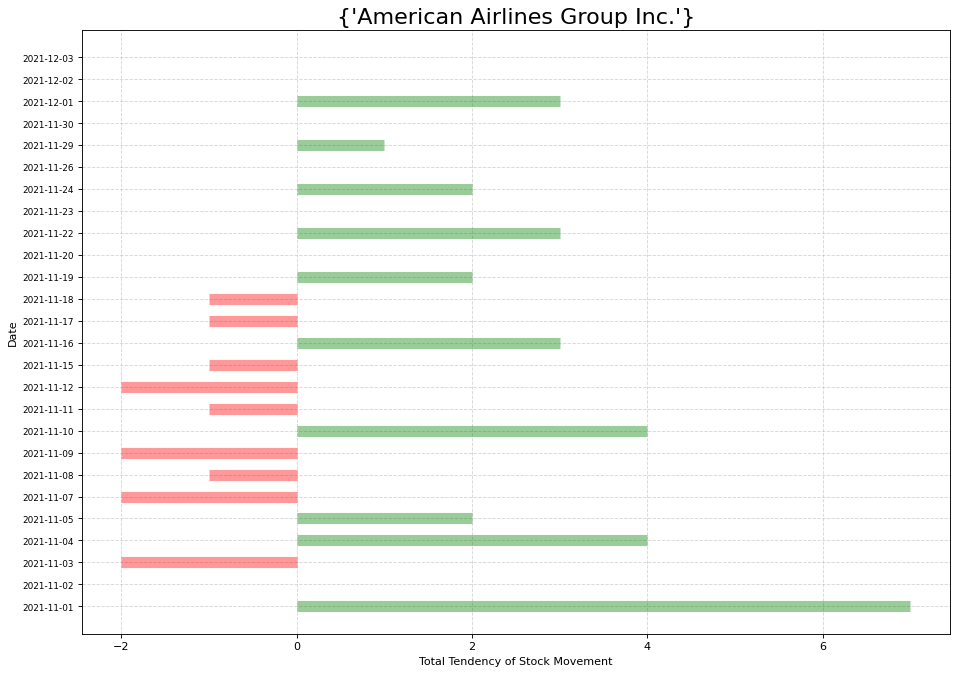

In [ ]:
from tabulate import tabulate as tblt
import matplotlib.pyplot as plt
tickerdf = pd.merge(pd.DataFrame(tickers).iloc[:,[0,2]],df0.iloc[:,[1,2]],on='ticker').drop_duplicates().reset_index(drop=True)
print("Enter the ticker of which you need the daily news headline sentiment ratio")
print(tblt(tickerdf, headers='keys', tablefmt='psql'))
choice = input()

get_by_ticker = df0[df0.ticker.isin([choice])].sort_values("date").reset_index(drop=True)
print("Proportion of sentiments:")
print(get_by_ticker.Bin_label.value_counts()/len(get_by_ticker)*100)
get_by_ticker.iloc[:,-1] = get_by_ticker.iloc[:,-1].replace("Down",-1)
get_by_ticker.iloc[:,-1] = get_by_ticker.iloc[:,-1].replace("Up",1)
plot_df = get_by_ticker.groupby(['date']).sum()

plot_df['date'] = plot_df.index
plot_df.reset_index(drop=True,inplace=True)
plot_df['colors'] = ['red' if float(x) < 0 else 'green' for x in plot_df['Bin_label']]

plt.figure(figsize=(14, 10), dpi=80)
plt.hlines(y=plot_df['date'], xmin=0, xmax=plot_df['Bin_label'],color=plot_df['colors'], alpha=0.4, linewidth=10)
plt.gca().set(ylabel='Date', xlabel='Total Tendency of Stock Movement')
plt.yticks(plot_df['date'], plot_df['date'], fontsize=8)
plt.grid(linestyle='--', alpha=0.5)
plt.title(str(set(df0[df0.ticker.isin([choice])].company.values)), fontdict={
          'size': 20})
plt.show()
